In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import nltk
import numpy as np

In [67]:
def cross(l1, l2):
    return [(x, y) for x in l1 for y in l2]

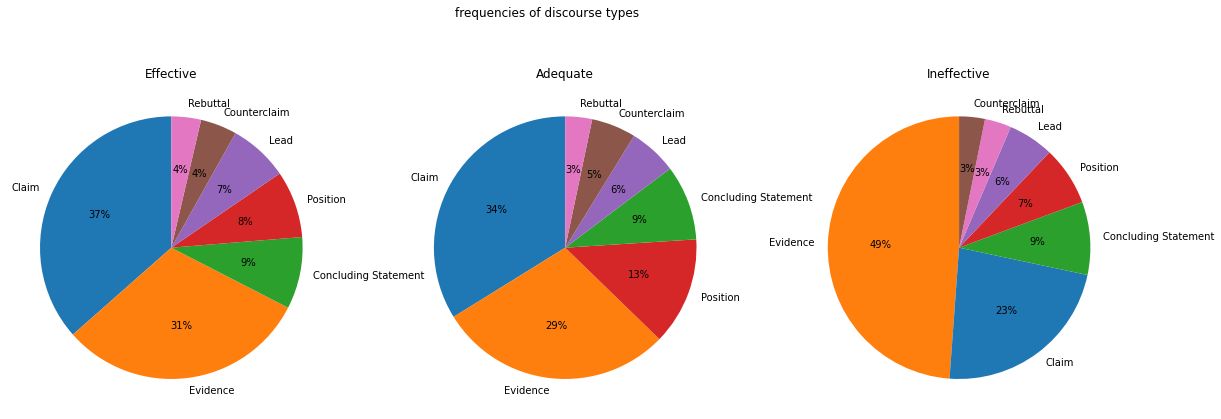

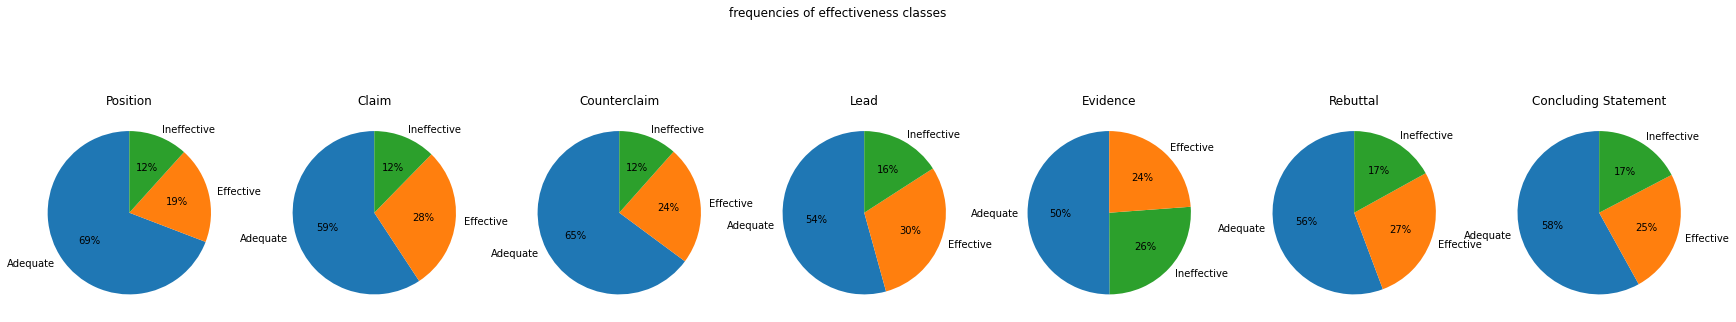

In [68]:
data = pd.read_csv("feedback-prize-effectiveness/train.csv")
discourse_types = set(data["discourse_type"])
effectiveness_classes = set(data["discourse_effectiveness"])

label_order_0 = []
mpl_colors = [(n, matplotlib.colors.TABLEAU_COLORS[n]) for n in list(matplotlib.colors.TABLEAU_COLORS)]

fig_pies, axs_pies = plt.subplots(1, len(effectiveness_classes))
fig_pies.suptitle('frequencies of discourse types')
for i, ec in enumerate(effectiveness_classes):
    freq = data[data.discourse_effectiveness == ec]['discourse_type'].value_counts()

    # circumventing matplotlibs auto sorting of colors
    label_order_i = list(map(lambda x: list(discourse_types).index(x), freq.keys()))
    if i == 0: label_order_0 = label_order_i.copy()

    freq.plot.pie(ax=axs_pies[i], title=ec, autopct='%1.0f%%', figsize=(20, 7), ylabel='', startangle=90,
                  colors=dict([mpl_colors[label_order_0.index(i)] for i in label_order_i]))

fig, axs = plt.subplots(1, len(discourse_types))
fig.suptitle('frequencies of effectiveness classes')
for i, dt in enumerate(discourse_types):
    freq = data[data.discourse_type == dt]['discourse_effectiveness'].value_counts()

    # circumventing matplotlibs auto sorting of colors
    label_order_i = list(map(lambda x: list(effectiveness_classes).index(x), freq.keys()))
    if i == 0: label_order_0 = label_order_i.copy()

    freq.plot.pie(ax=axs[i], title=dt, autopct='%1.0f%%', figsize=(30, 6), ylabel='', startangle=90,
                  colors=dict([mpl_colors[label_order_0.index(i)] for i in label_order_i]))


In [69]:
data['len_chars'] = [len(text) for text in data['discourse_text']]
data['len_tokens'] = [len(nltk.tokenize.wordpunct_tokenize(text)) for text in data['discourse_text']]

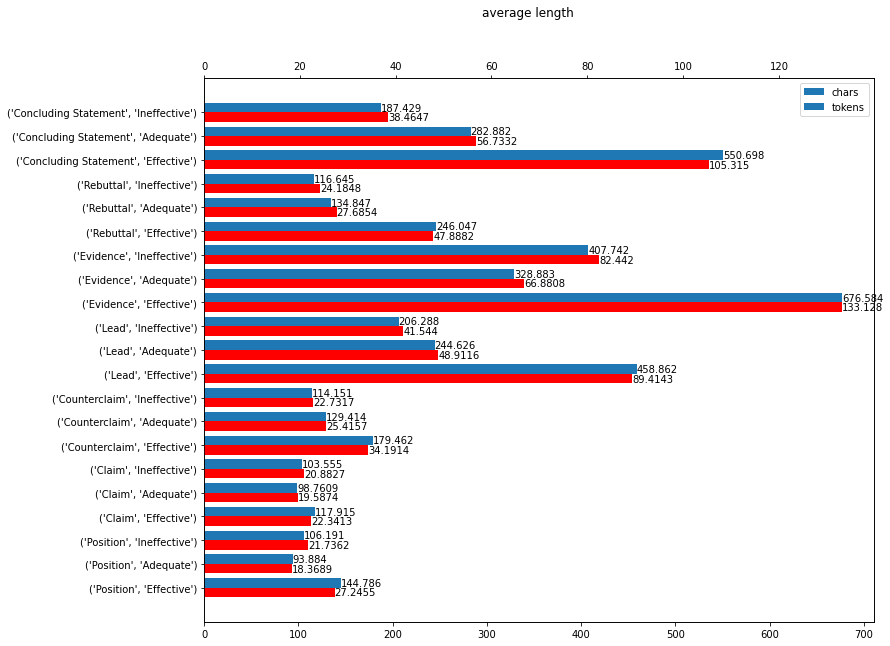

In [70]:
mean_len_char = {}
mean_len_tokens = {}
for dt, de in cross(discourse_types, effectiveness_classes):
    rows_selection = data[(data.discourse_effectiveness == de) & (data.discourse_type == dt)]
    mean_len_char[dt, de] = rows_selection['len_chars'].mean()
    mean_len_tokens[dt, de] = rows_selection['len_tokens'].mean()

fig, ax_char = plt.subplots(figsize=(12, 10))
fig.suptitle('average length')
ax_token = ax_char.twiny()
bar_pos = np.arange(len(mean_len_char.values()))
bars_char = ax_char.barh(bar_pos+0.2, mean_len_char.values(), height=0.4, label='chars')
bars_token = ax_token.barh(bar_pos-0.2, mean_len_tokens.values(), height=0.4, label='tokens', color='red')
ax_token.set_yticks(bar_pos, list(map(str, list(mean_len_tokens.keys()))))
ax_char.bar_label(bars_char)
ax_token.bar_label(bars_token)
ax_char.legend(bars_char+bars_token, ['chars', 'tokens'], loc='upper right')
print()

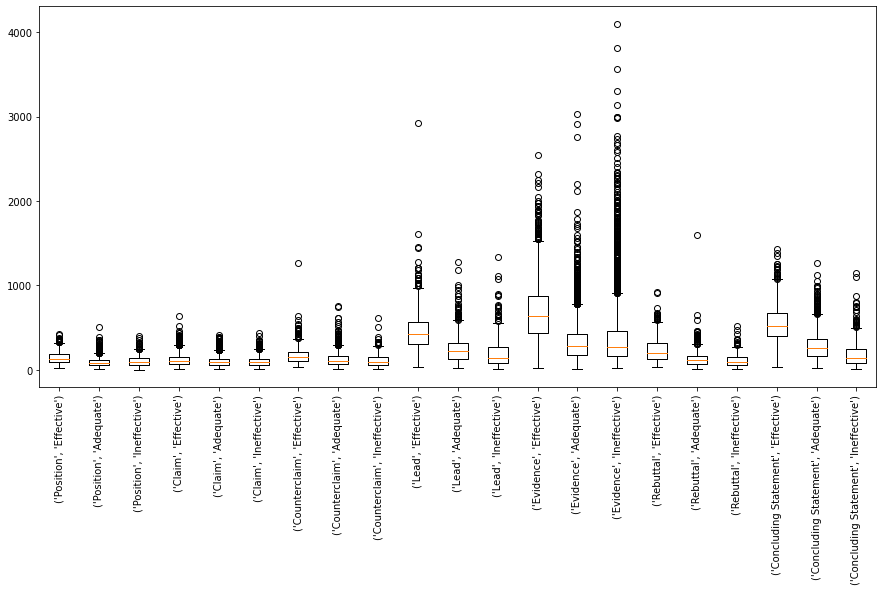

In [71]:
dt_ec_cross = cross(discourse_types, effectiveness_classes)
_, ax = plt.subplots(figsize=(15,7))
x = [data[(data.discourse_effectiveness == de) & (data.discourse_type == dt)]['len_chars'].values
     for dt, de in dt_ec_cross]
ax.boxplot(x)
ax.set_xticks(range(1, len(dt_ec_cross)+1), list(map(str, dt_ec_cross)), rotation=90)
print()